# First part

blablba**CountVectorizer** handles all the messy text preprocessing for us. It takes raw text and converts it into a matrix of word counts—exactly the Bag-of-Words representation we built manually. When you call `fit()`, it builds a vocabulary from your training data, then `transform()` converts any text into counts using that vocabulary. It returns a sparse matrix, which is important: if your vocabulary has 10,000 words but a document only contains 50 unique words, why store 9,950 zeros?

**MultinomialNB** is scikit-learn's Naive Bayes for count data. Under the hood, it's doing exactly what we coded earlier: calculating P(Class) and P(word|Class) for every word in the vocabulary, with Laplace smoothing (controlled by the `alpha` parameter, defaulting to 1.0). The "Multinomial" refers to the statistical distribution it assumes for word counts.

**Pipeline** chains these steps together elegantly. Think of it as a recipe: "First vectorize the text, then classify it." This has a subtle but important benefit—when you call `fit()` on the pipeline, it learns the vocabulary from training data only. When you call `predict()`, it uses that same vocabulary, ensuring train-test consistency. Without a pipeline, you might accidentally introduce data leakage by letting test data influence your vocabulary.

In [1]:
# Temperature and humidity measurements
measurements = [
    {'temperature': 18.5, 'humidity': 75},
    {'temperature': 22.0, 'humidity': 60},
    {'temperature': 15.2, 'humidity': 80},
    {'temperature': 20.1, 'humidity': 65},
]

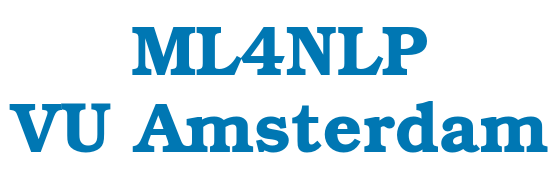

In [4]:
# logo_str = "Machine Learning for NLP\nVU Amsterdam"
logo_str = "ML4NLP\nVU Amsterdam"

import matplotlib.pyplot as plt
color = '#0077b3'
fontname = "Sans"
fontname = "URW Bookman"
fig, ax = plt.subplots(figsize=(6, 2))
# ax.text(0.5, 0.5, logo_str, fontsize=20, ha='center', va='center', fontweight='bold')
# ax.text(0.5, 0.5, logo_str, fontsize=30, fontname=fontname , ha='center', va='center', fontweight='bold', color=color)
ax.text(0.5, 0.5, logo_str, fontsize=50, fontname=fontname , ha='center', va='center', fontweight='bold', color=color)

ax.axis('off')
plt.tight_layout()
# plt.savefig('logo.png', dpi=150)
# plt.close(fig)
plt.show()

# plt.savefig('logo_vu.png', dpi=150, transparent=True)
# plt.close(fig)


/tmp/ipykernel_8224/562539963.py:18: UserWarning: Glyph 108 (l) missing from font(s) FontAwesome.
  plt.tight_layout()
/tmp/ipykernel_8224/562539963.py:18: UserWarning: Glyph 112 (p) missing from font(s) FontAwesome.
  plt.tight_layout()
/tmp/ipykernel_8224/562539963.py:18: UserWarning: Glyph 70 (F) missing from font(s) FontAwesome.
  plt.tight_layout()
/tmp/ipykernel_8224/562539963.py:18: UserWarning: Glyph 111 (o) missing from font(s) FontAwesome.
  plt.tight_layout()
/tmp/ipykernel_8224/562539963.py:18: UserWarning: Glyph 110 (n) missing from font(s) FontAwesome.
  plt.tight_layout()
/tmp/ipykernel_8224/562539963.py:18: UserWarning: Glyph 116 (t) missing from font(s) FontAwesome.
  plt.tight_layout()
/tmp/ipykernel_8224/562539963.py:18: UserWarning: Glyph 65 (A) missing from font(s) FontAwesome.
  plt.tight_layout()
/tmp/ipykernel_8224/562539963.py:18: UserWarning: Glyph 119 (w) missing from font(s) FontAwesome.
  plt.tight_layout()
/tmp/ipykernel_8224/562539963.py:18: UserWarning: 

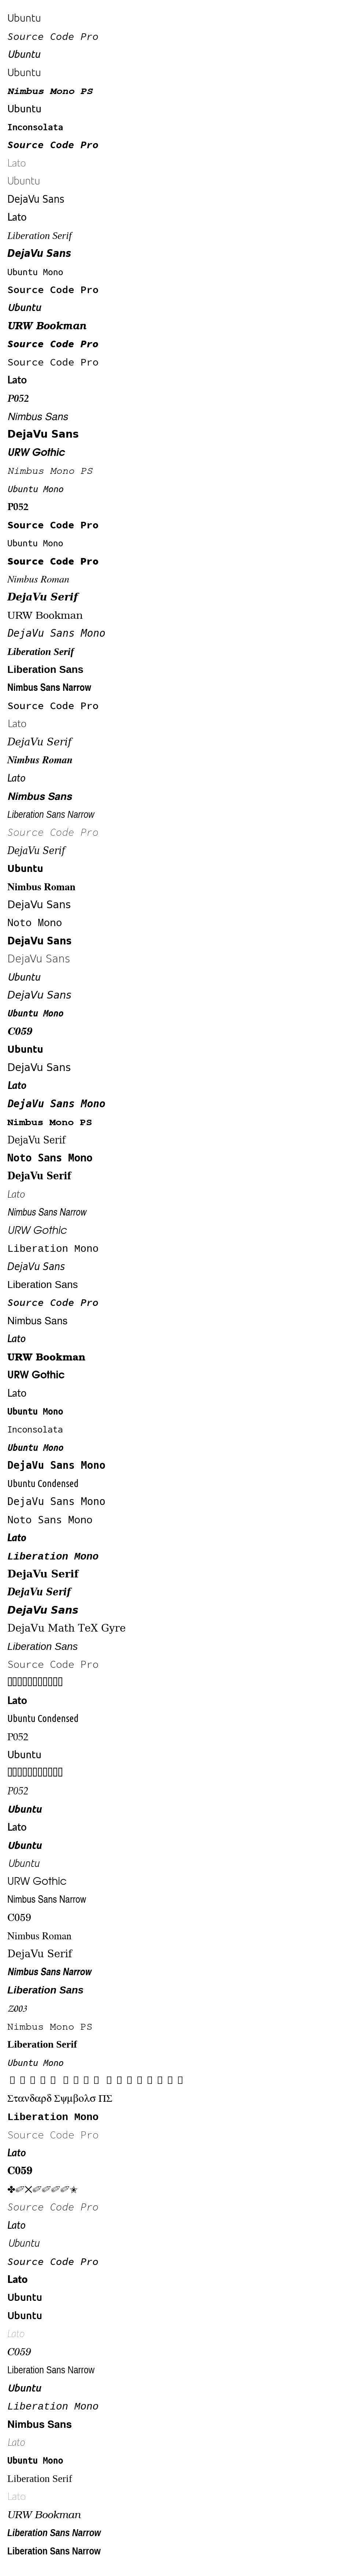

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Get a list of font paths
font_paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# Limit to first 20 fonts for readability
# font_paths = font_paths[:20]
font_paths = font_paths
plt.figure(figsize=(10, len(font_paths) * 0.5))
for i, font_path in enumerate(font_paths):
    font_prop = fm.FontProperties(fname=font_path)
    font_name = font_prop.get_name()
    plt.text(0.01, 1 - (i + 1) / (len(font_paths) + 1), font_name, fontproperties=font_prop, fontsize=20 )

plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:


import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')


['/usr/share/fonts/truetype/ubuntu/Ubuntu-L.ttf',
 '/home/feynman/anaconda3/fonts/SourceCodePro-It.ttf',
 '/home/feynman/anaconda3/fonts/Ubuntu-RI.ttf',
 '/home/feynman/anaconda3/fonts/Ubuntu-L.ttf',
 '/usr/share/fonts/opentype/urw-base35/NimbusMonoPS-BoldItalic.otf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-R.ttf',
 '/home/feynman/anaconda3/fonts/Inconsolata-Bold.ttf',
 '/home/feynman/anaconda3/fonts/SourceCodePro-BoldIt.ttf',
 '/usr/share/fonts/truetype/lato/Lato-Thin.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-Th.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed.ttf',
 '/usr/share/fonts/truetype/lato/Lato-Medium.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-BoldOblique.ttf',
 '/usr/share/fonts/truetype/ubuntu/UbuntuMono-R.ttf',
 '/home/feynman/anaconda3/fonts/SourceCodePro-Semibold.ttf',
 '/home/feynman/anaconda3/fonts/Ubuntu-MI.ttf',
 '/usr/share/fonts/opentype/urw-base35/URWBookman-D